In [2]:
from sklearn.cluster import KMeans
import numpy as np
import pandas as pd

In [6]:

# Cargar el dataset (descargarlo desde Kaggle si no lo tienes)
url = 'C:/Users/Diego/Desktop/ML/data/train/titanic.csv'

# Configuración para mostrar todas las columnas
pd.set_option('display.max_columns', None)

# Configuración para mostrar todo el contenido de las columnas
pd.set_option('display.max_colwidth', None)

# Configuración para mostrar todas las filas (si es necesario)
pd.set_option('display.max_rows', None)

df = pd.read_csv(url)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [10]:
# Explorar el conjunto de datos
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 831 entries, 0 to 830
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  831 non-null    int64  
 1   Survived     831 non-null    int64  
 2   Pclass       831 non-null    int64  
 3   Name         831 non-null    object 
 4   Sex          831 non-null    int64  
 5   Age          831 non-null    float64
 6   SibSp        831 non-null    int64  
 7   Parch        831 non-null    int64  
 8   Ticket       831 non-null    object 
 9   Fare         831 non-null    float64
 10  Cabin        192 non-null    object 
 11  Embarked     831 non-null    float64
dtypes: float64(3), int64(6), object(3)
memory usage: 78.0+ KB
None


In [7]:
# Convertir variables categóricas a variables numéricas
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})
df['Embarked'] = df['Embarked'].map({'S': 0, 'C': 1, 'Q': 2})

# Rellenar valores nulos
df['Age'].fillna(df['Age'].mean(), inplace=True)
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

In [19]:
# Identificar columnas categóricas y numéricas
categoricas = df.select_dtypes(include=['object', 'category'])
numericas = df.select_dtypes(include=['int64', 'float64'])

print("Columnas categóricas:", categoricas.columns)
print("Columnas numéricas:", numericas.columns)

df = df.drop(columns='PassengerId')

df = df.drop(columns=categoricas.columns)


Columnas categóricas: Index([], dtype='object')
Columnas numéricas: Index(['PassengerId', 'Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch',
       'Fare', 'Embarked'],
      dtype='object')


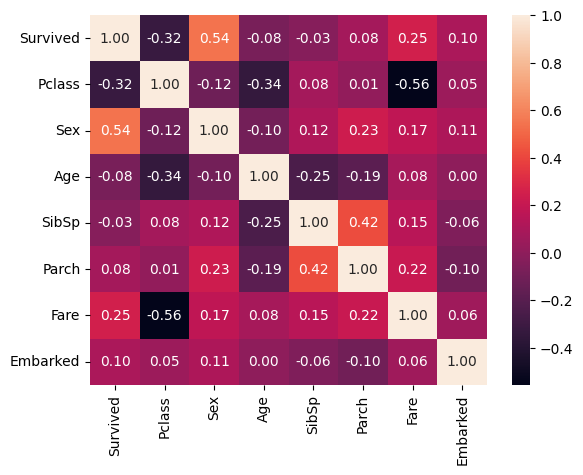

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

# Matriz de correlación
corr = df.corr()
sns.heatmap(corr, annot=True, fmt='.2f')
plt.show()


In [24]:
mask

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
Survived,True,False,True,False,False,False,False,False
Pclass,False,True,False,False,False,False,True,False
Sex,True,False,True,False,False,False,False,False
Age,False,False,False,True,False,False,False,False
SibSp,False,False,False,False,True,False,False,False
Parch,False,False,False,False,False,True,False,False
Fare,False,True,False,False,False,False,True,False
Embarked,False,False,False,False,False,False,False,True


In [26]:
# Crear una máscara para filtrar columnas con correlación absoluta mayor que 0.5
threshold = 0.5
mask = (corr.abs() < threshold)

# Obtener las columnas que cumplen con la condición
columns_to_keep = mask.columns[mask.any()]

# Crear una nueva matriz de correlación con las columnas filtradas
new_corr = corr.loc[columns_to_keep, columns_to_keep]

# Mostrar la nueva matriz de correlación
print("\nNueva matriz de correlación (solo columnas con |correlación| > 0.5):")
print(new_corr)


Nueva matriz de correlación (solo columnas con |correlación| > 0.5):
          Survived    Pclass       Sex       Age     SibSp     Parch  \
Survived  1.000000 -0.320057  0.541606 -0.077430 -0.028703  0.082036   
Pclass   -0.320057  1.000000 -0.116396 -0.337500  0.079031  0.010739   
Sex       0.541606 -0.116396  1.000000 -0.098409  0.116522  0.233816   
Age      -0.077430 -0.337500 -0.098409  1.000000 -0.249803 -0.188501   
SibSp    -0.028703  0.079031  0.116522 -0.249803  1.000000  0.418386   
Parch     0.082036  0.010739  0.233816 -0.188501  0.418386  1.000000   
Fare      0.252462 -0.555048  0.174581  0.084650  0.152344  0.216028   
Embarked  0.101386  0.051618  0.108091  0.003588 -0.055501 -0.101304   

              Fare  Embarked  
Survived  0.252462  0.101386  
Pclass   -0.555048  0.051618  
Sex       0.174581  0.108091  
Age       0.084650  0.003588  
SibSp     0.152344 -0.055501  
Parch     0.216028 -0.101304  
Fare      1.000000  0.061526  
Embarked  0.061526  1.000000  


In [30]:
# Obtener las correlaciones absolutas con la columna 'Survived', excluyendo 'Survived' mismo
survived_corr_abs = corr['Survived'].drop('Survived').abs()

# Calcular el promedio de las correlaciones absolutas con 'Survived'
mean_corr_abs = survived_corr_abs.mean()

# Filtrar las características que tienen una correlación absoluta mayor que el promedio
features_above_average_abs = survived_corr_abs[survived_corr_abs > mean_corr_abs]

# Mostrar las características con correlaciones absolutas mayores que el promedio
print("\nCaracterísticas con correlación absoluta con 'Survived' mayor que el promedio (excluyendo 'Survived'):")
print(features_above_average_abs)


Características con correlación absoluta con 'Survived' mayor que el promedio (excluyendo 'Survived'):
Pclass    0.320057
Sex       0.541606
Fare      0.252462
Name: Survived, dtype: float64


In [31]:
# Análisis de importancia (Ejemplo con Random Forest)
from sklearn.ensemble import RandomForestClassifier

X = df.drop('Survived', axis=1)  # Cambia esto según tu variable objetivo
y = df['Survived']

model = RandomForestClassifier()
model.fit(X, y)

# Importancia de características
importancia = model.feature_importances_
features = X.columns
feature_importance = pd.Series(importancia, index=features).sort_values(ascending=False)

print(feature_importance)

Fare        0.271989
Age         0.267027
Sex         0.255921
Pclass      0.085038
SibSp       0.049214
Parch       0.035992
Embarked    0.034819
dtype: float64


In [32]:
# Calcular el promedio de las importancias
mean_importance = feature_importance.mean()

# Filtrar las características que tienen una importancia mayor que el promedio
important_features = feature_importance[feature_importance > mean_importance]

# Mostrar las características importantes
print("Características con importancia mayor que el promedio:")
print(important_features)

Características con importancia mayor que el promedio:
Fare    0.271989
Age     0.267027
Sex     0.255921
dtype: float64


In [35]:
# Crear un DataFrame con las características
features_above_average_df = features_above_average_abs.index.to_frame(name='Feature')
important_features_df = important_features.index.to_frame(name='Feature')

# Combinar las dos DataFrames
combined_features_df = pd.concat([features_above_average_df, important_features_df])

# Eliminar duplicados
unique_features_df = combined_features_df.drop_duplicates()

# Guardar el resultado en un archivo CSV
unique_features_df.to_csv('C:/Users/Diego/Desktop/ML/features/titanic/important_features.csv', index=False)